In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd

In [2]:
train_db = pd.read_csv('../data/mnist.csv')
train_db.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y = train_db['label'].values.flatten() 
x = train_db.drop(['label'],axis=1).values 

print(x.shape)
print(y.shape)

(42000, 784)
(42000,)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)
print(x_train.shape)
print(x_test.shape)

(31500, 784)
(10500, 784)


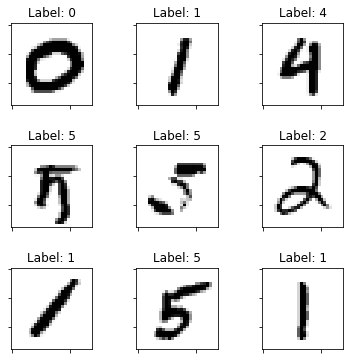

In [5]:
# Plot
n = 3
fig, ax = plt.subplots(nrows=n, ncols=n, figsize=(6,6))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(n):
    for j in range(n):
        ind = np.random.randint(x.shape[0])
        
        tmp = x[ind, :].reshape(28,28)
        ax[i,j].set_title("Label: {}".format(y[ind]))
        ax[i,j].imshow(tmp, cmap='gray_r') # display it as gray colors.
        
        plt.setp(ax[i,j].get_xticklabels(), visible=False)
        plt.setp(ax[i,j].get_yticklabels(), visible=False)
        
plt.show()

In [6]:
# Parametets
hid1_dim = 512
hid2_dim = 512
hid3_dim = 100
batch = 128

In [ ]:
clf = MLPClassifier(
    solver='adam',
    hidden_layer_sizes=(hid1_dim, hid2_dim, hid3_dim),
    random_state=1,
    batch_size=batch,
    verbose=10,
    max_iter=10
)
model = clf.fit(x/255.0, y)

Iteration 1, loss = 0.26087461
Iteration 2, loss = 0.09461334
Iteration 3, loss = 0.05884163
Iteration 4, loss = 0.04379284
Iteration 5, loss = 0.03145882
Iteration 6, loss = 0.02705977


In [26]:
train_db['label_pred'] = model.predict(x/255.0)
train_db['valid_pred'] = train_db.apply(lambda row: row['label_pred']==row['label'], axis=1)

print('Training Accuracy: {:.5f}'.format(model.score(x,y)))
ytp = model.predict(x)

Training Accuracy: 0.99019
